In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
dataset_path = "/content/drive/MyDrive/wildhub/raw-img"

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
train_datagen = ImageDataGenerator(
    shear_range=0.2,  # Adjust data augmentation parameters as needed
    zoom_range=0.2,
    horizontal_flip=True
)
validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    dataset_path + "/train",  # Replace with path to training subfolder
    target_size=(224, 224),  # Adjust image size as needed
    batch_size=32,
    class_mode="categorical"  # Adjust for binary or multi-class classification
)

validation_generator = validation_datagen.flow_from_directory(
    dataset_path + "/validation",  # Replace with path to validation subfolder
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/wildhub/train'

In [26]:
import pathlib
data_dir = pathlib.Path(dataset_path)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(256, 256),
  batch_size=32)

Found 6001 files belonging to 5 classes.
Using 4801 files for training.


In [27]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(256, 256),
  batch_size=32)

Found 6001 files belonging to 5 classes.
Using 1200 files for validation.


In [28]:
class_names = train_ds.class_names
print(class_names)

['BUTTERFLY [RHOPALOCERA]', 'CAT [FELIS CATUS]', 'DOG [CANIS LUPUS FAMILIARIS]', 'ELEPHANT [ELEPHANTIDAE]', 'HORSE [EQUUS CABALLUS]']


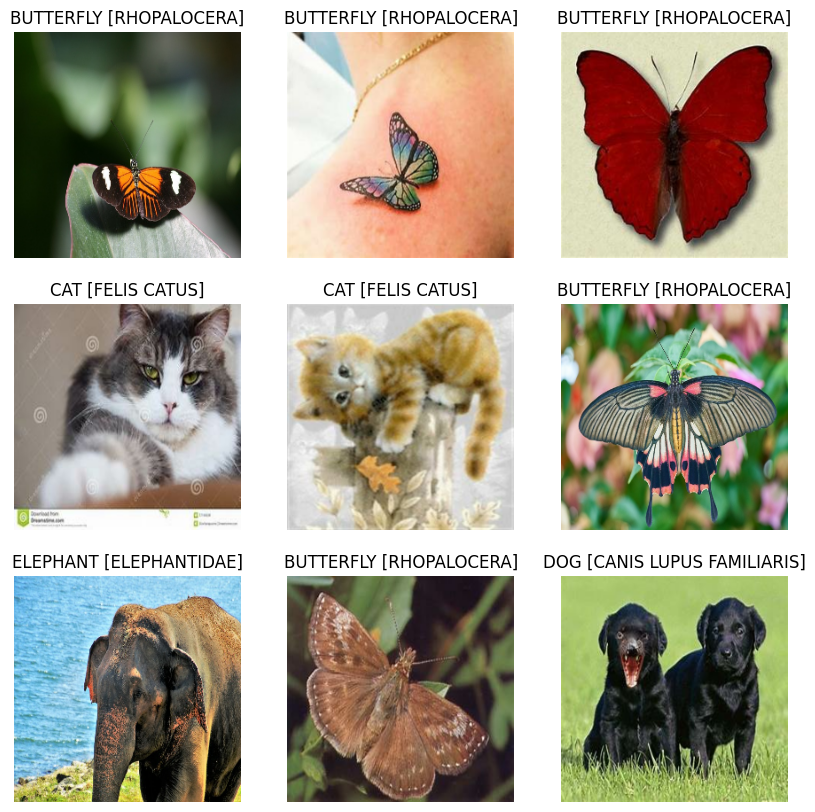

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [30]:
num_classes = 5

model = Sequential([

  layers.experimental.preprocessing.Rescaling(1./255, input_shape = (256,256,3)),
  layers.Conv2D(16, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation = 'softmax')
])

In [31]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [32]:
epochs = 5
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


151/151 [==============================] - 675s 4s/step - loss: 1.2398 - accuracy: 0.5207 - val_loss: 0.9974 - val_accuracy: 0.6217
Epoch 2/5
151/151 [==============================] - 27s 175ms/step - loss: 0.8799 - accuracy: 0.6490 - val_loss: 1.1009 - val_accuracy: 0.5750
Epoch 3/5
151/151 [==============================] - 27s 176ms/step - loss: 0.6606 - accuracy: 0.7455 - val_loss: 0.8211 - val_accuracy: 0.6958
Epoch 4/5
151/151 [==============================] - 27s 174ms/step - loss: 0.4378 - accuracy: 0.8407 - val_loss: 0.8715 - val_accuracy: 0.6958
Epoch 5/5
151/151 [==============================] - 27s 175ms/step - loss: 0.2742 - accuracy: 0.9013 - val_loss: 1.0875 - val_accuracy: 0.6975


In [33]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)
print('\nTest accuracy:', test_acc)

38/38 - 9s - loss: 1.0875 - accuracy: 0.6975 - 9s/epoch - 243ms/step

Test accuracy: 0.6974999904632568


In [34]:
tf.keras.models.save_model(model,'my_model.hdf5')

<ipython-input-34-5ffa4cf24db1>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,'my_model.hdf5')
